שאלות המחקר המבוקשות הן:
1. מהי רמת הקורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות.
2. האם ניתן להגיע לנוסחה מסוימת ולפיה ככלל סטיית התקן שבין שתי הבדיקות דומה פחות או יותר.
3. האם יש קשר בין מקום ביצוע בדיקת הכוסית לבין הקורלציה בנתונים השונים של הבדיקות (דהיינו האם עדיף לשלוח למקום שבו עושים הרבה בדיקות כוסית כי אז הן יהיו יותר מדויקות או שאין משמעות).
4. האם דגימה של כוסית בנפח גבוה יותר (מעל 0.5 מ"ל או מעל 1 מ"ל) נותנת נתונים אמינים יותר?

In [5]:
import xlrd
import pandas as pd
import seaborn as sns

# df = pd.read_excel("check.xls", na_values=['לא ידוע', 'אין'])
df = pd.ExcelFile("https://github.com/aviadm24/jupyter/blob/master/check.xls?raw=true")
df = pd.read_excel(df, na_values=['לא ידוע', 'אין'])
df.columns = ["id", "hospital", "valume", "con_cup", "con_check", "movement_cup", "movement_check", "formation_cup", "formation_check"]
df.hospital = pd.Categorical(df.hospital)
df['code'] = df.hospital.cat.codes
# df['formation_cup'] = df["formation_cup"].str.repalce("WHO","")
df['formation_cup'] = df['formation_cup'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))
df['formation_check'] = df['formation_check'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))

In [6]:
import numpy as np
import numpy.ma as ma

# df['formation_cup'] = df['formation_cup'].fillna(0, inplace=True)
# df['formation_check'] = df['formation_check'].fillna(0, inplace=True)
for index,i in enumerate(df['formation_check']):
    if isinstance(i, str):
        try:
            df['formation_check'][index] = int(i)
        except:
            pass
# print(ma.corrcoef(ma.masked_invalid(df['formation_cup']), ma.masked_invalid(df['formation_check'])))
# msk = (~df['formation_cup'].mask & ~df['formation_check'].mask)

# print(ma.corrcoef(df['formation_cup'][msk],df['formation_check'][msk]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [7]:
corr_movement = df["movement_cup"].astype('float').corr(df["movement_check"]).astype('float')
corr_consertrat = df["con_cup"].corr(df["con_check"])
corr_formation = df["formation_cup"].astype('float').corr(df["formation_check"].astype('float'))


In [8]:
print("corr_movement: ", corr_movement)
print("corr_consertrat: ", corr_consertrat)
print("corr_formation: ", corr_formation)

corr_movement:  0.6318152917636762
corr_consertrat:  0.7138309800573162
corr_formation:  0.6590311986439481


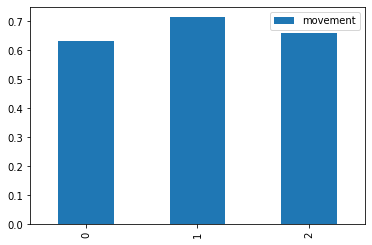

In [9]:
corrDf = pd.DataFrame([[corr_movement,], [corr_consertrat,], [corr_formation,]], columns=["movement"])#, "contrast", "formation"])
corrDf.plot(kind='bar')

In [10]:
df

,id,hospital,valume,con_cup,con_check,movement_cup,movement_check,formation_cup,formation_check,code
0,56674,אחר,NaN,0.2,2.0,0.0001,0.0001,0,2,0
1,57548,שפרה,1,12.0,30.0,25.0000,20.0000,2,4,3
2,73934,שפרה,0.5,0.8,0.5,38.0000,20.0000,nan,nan,3
3,75504,אחר,1.5,75.0,33.0,30.0000,55.0000,14,nan,0
4,76665,שערי צדק,NaN,30.0,50.0,40.0000,40.0000,13,nan,2
...,...,...,...,...,...,...,...,...,...,...
120,100721,שפרה,2.5,2.2,2.0,0.0000,0.0000,0,0,3
121,101131,אחר,3,14.0,8.0,36.0000,50.0000,7,0,0
122,101418,שפרה,1,37.0,59.0,54.0000,36.0000,3,nan,3
123,101721,אחר,1,19.0,25.0,26.0000,20.0000,2,3,0


In [11]:
# compareMovement_df = df(data=df, columns=["movement_cup", "movement_check"])
plotDf = pd.DataFrame()
plotDf["moveCup"] = df["movement_cup"]
plotDf["moveCheck"] = df["movement_check"]

In [12]:
plotDf

,moveCup,moveCheck
0,0.0001,0.0001
1,25.0000,20.0000
2,38.0000,20.0000
3,30.0000,55.0000
4,40.0000,40.0000
...,...,...
120,0.0000,0.0000
121,36.0000,50.0000
122,54.0000,36.0000
123,26.0000,20.0000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


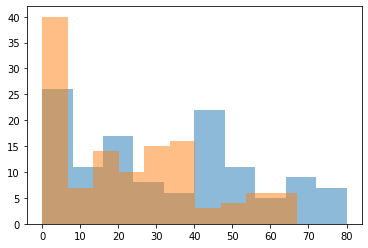

In [13]:
import matplotlib.pyplot as plt
for col in ["moveCheck","moveCup"]:
    plt.hist(plotDf[col], alpha=0.5)

In [14]:
print(len(df.groupby(['code']).groups))

4


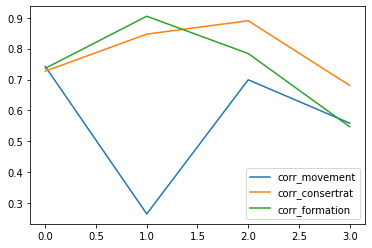

In [15]:
move_list = []
consert_list = []
formation_list = []

for i in range(len(df.groupby(['code']).groups)):
    hospital_acher = df.groupby(['code']).get_group(i)
    corr_movement = hospital_acher["movement_cup"].corr(hospital_acher["movement_check"])
    corr_consertrat = hospital_acher["con_cup"].corr(hospital_acher["con_check"])
    corr_formation = hospital_acher["formation_cup"].astype('float').corr(hospital_acher["formation_check"].astype('float'))
    move_list.append(corr_movement)
    consert_list.append(corr_consertrat)
    formation_list.append(corr_formation)
corr_df = pd.DataFrame()
corr_df["corr_movement"] = move_list
corr_df["corr_consertrat"] = consert_list
corr_df["corr_formation"] = formation_list
corr_df.plot()

In [27]:
hospital_acher = df.groupby(['code']).get_group(1)

In [28]:
corr_movement = hospital_acher["movement_cup"].corr(hospital_acher["movement_check"])
corr_consertrat = hospital_acher["con_cup"].corr(hospital_acher["con_check"])
corr_formation = hospital_acher["formation_cup"].astype('float').corr(hospital_acher["formation_check"].astype('float'))
print("corr_movement: ", corr_movement)
print("corr_consertrat: ", corr_consertrat)
print("corr_formation: ", corr_formation)

corr_movement:  0.26471563073480164
corr_consertrat:  0.8469620500019732
corr_formation:  0.9048528643280352


In [18]:
corr_df = pd.DataFrame()
corr_df["corr_movement"] = [corr_movement]
corr_df["corr_consertrat"] = [corr_consertrat]
corr_df["corr_formation"] = [corr_formation]

In [19]:
corr_df

,corr_movement,corr_consertrat,corr_formation
0,0.742119,0.727016,0.73629


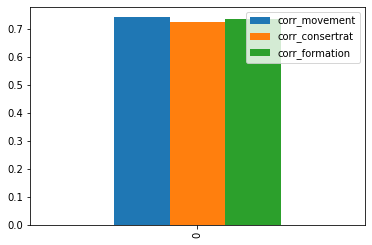

In [20]:
corr_df.plot(kind="bar")

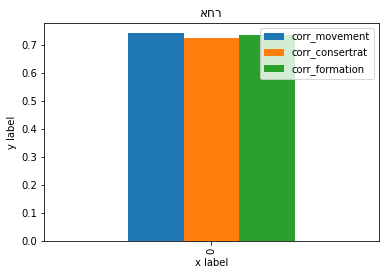

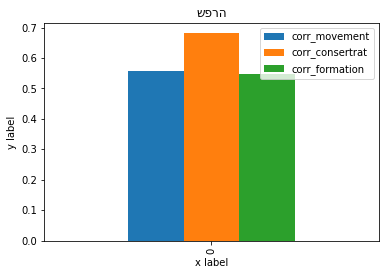

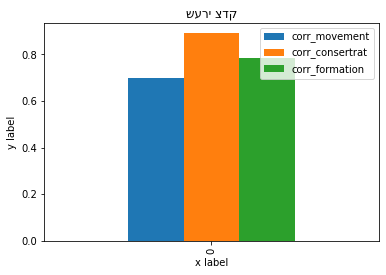

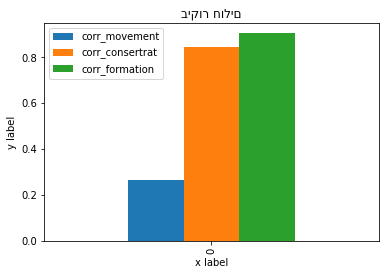

In [26]:
group_names = df.hospital.unique()
for name in group_names:
# for i in range(len(df.groupby(['hospital']))):
  hospital_number = df.groupby(['hospital']).get_group(name)
  corr_movement = hospital_number["movement_cup"].corr(hospital_number["movement_check"])
  corr_consertrat = hospital_number["con_cup"].corr(hospital_number["con_check"])
  corr_formation = hospital_number["formation_cup"].astype('float').corr(hospital_number["formation_check"].astype('float'))
  corr_df = pd.DataFrame()
  corr_df["corr_movement"] = [corr_movement]
  corr_df["corr_consertrat"] = [corr_consertrat]
  corr_df["corr_formation"] = [corr_formation]
  plt = corr_df.plot(kind="bar", title = name)
  plt.set_xlabel("x label")
  plt.set_ylabel("y label")
